In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import swifter

In [4]:
df_pancan=pd.read_csv('pancan.csv')
df_pancan.drop('Unnamed: 0',axis=1,inplace=True)

# For loop for all the different types of Linkage

Silhouette score is a metric used to evaluate the quality of clustering results in unsupervised learning. It measures how well each data point in a cluster is separated from other clusters based on a given distance metric. It ranges from -1 to 1, with higher values indicating better clustering.
The Silhouette score ranges from -1 to 1, where a score of -1 indicates that the data point is probably assigned to the wrong cluster, a score of 0 indicates that the data point is close to the decision boundary between two clusters, and a score of 1 indicates that the data point is well separated from other clusters.

In clustering analysis, the Silhouette score is used to evaluate the quality of the clustering results and to select the optimal number of clusters. A higher Silhouette score indicates better clustering quality, while a lower score indicates that the clusters are not well separated.

The Calinski-Harabasz score is a metric used to evaluate the quality of clustering results in unsupervised learning. It measures the ratio of the between-cluster dispersion and the within-cluster dispersion, and is also known as the Variance Ratio Criterion. A higher Calinski-Harabasz score indicates better clustering quality.
The Calinski-Harabasz score is a metric used to evaluate the quality of clustering results in unsupervised learning. It measures the ratio of the between-cluster dispersion and the within-cluster dispersion, and is also known as the Variance Ratio Criterion. A higher Calinski-Harabasz score indicates better clustering quality.

In [64]:
def complex_euclidean_distance(u, v):
    return np.sqrt(np.sum(np.abs(u - v) ** 2))
def heirarchial_wss(input_dataframe,labels_array,no_of_clusters):
    input_dataframe_clustered=input_dataframe.copy()
    input_dataframe_clustered['Labels']=labels_array
    new_centroids=input_dataframe_clustered.groupby('Labels').mean()
    new_centroids=new_centroids.T
    total_error=[]
    for cluster in range(1,no_of_clusters+1):
        df_data_label_cluster=input_dataframe_clustered[input_dataframe_clustered['Labels']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Labels',axis=1)
        centroids=pd.DataFrame(new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric=complex_euclidean_distance)
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)    

def silheoutte_score(input_dataframe,labels):
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(input_dataframe, labels)
    return silhouette_avg

def Calinski_Harbaz_score(input_dataframe,labels):
    from sklearn.metrics import calinski_harabasz_score
    chs=calinski_harabasz_score(input_dataframe,labels)
    return chs

# Note about different indexes used

Internal methods: Internal methods evaluate the quality of clustering based on the data alone, without reference to external information. The most commonly used internal method for hierarchical clustering is the Calinski-Harabasz score, which measures the ratio of between-cluster variance to within-cluster variance. The higher the score, the better the clustering.

Relative methods: Relative methods compare the quality of clustering between different clustering solutions. The most commonly used relative method for hierarchical clustering is the Silhouette score, which measures the average distance between each data point and its own cluster compared to other clusters. The higher the Silhouette score, the better the clustering.

In [53]:
def heirarchial_code_run(linkage_type):
    import pandas as pd
    from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from scipy.cluster.hierarchy import fcluster
    scaler = StandardScaler()
    df_pancan_sample_scaled =pd.DataFrame(scaler.fit_transform(df_pancan))
    heirarchial_clustering=linkage(df_pancan_sample_scaled,method=linkage_type)
    #For exactly Five Clusters
    distance_threshold = heirarchial_clustering[-5, 2] 
    labels = fcluster(heirarchial_clustering, distance_threshold, criterion='distance')
    error=heirarchial_wss(df_pancan,labels,5)
    silhouette_avg=silheoutte_score(df_pancan,labels)
    chs=Calinski_Harbaz_score(df_pancan,labels)
    return error,linkage_type,silhouette_avg,chs
    
    

In [106]:
error_dict={}
silheoutte_dict={}
chs_dict={}
linkage_type=['complete','ward','single','average']
for i in linkage_type:
    error,linkage_type,silheotte_score,chs=heirarchial_code_run(str(i))
    error_dict[i]=error
    silheoutte_dict[i]=silheotte_score
    chs_dict[i]=chs
print(error_dict)
print(silheoutte_dict)
print(chs_dict)

{'complete': 147834.523, 'ward': 118082.456, 'single': 149993.538, 'average': 149952.799}
{'complete': 0.024236751587086512, 'ward': 0.20658369213618122, 'single': 0.04589297271753236, 'average': 0.08040389513746841}
{'complete': 8.420108350325366, 'ward': 115.94599402388728, 'single': 1.8996087077368187, 'average': 2.0423524792458214}


In [107]:
error_df=pd.DataFrame([error_dict])
error_df['Method']='Before_PCA'
silheoutte_df=pd.DataFrame([silheoutte_dict])
silheoutte_df['Method']='Before_PCA'
chs_df=pd.DataFrame([chs_dict])
chs_df['Method']='Before_PCA'

# Applying PCA to the Dataset

In [57]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

def covariance(input_dataframe):
    '''
    This function takse input as a standardized dataframe
    '''
    input_dataframe_mean = input_dataframe.swifter.apply(np.mean, axis=0)
    input_dataframe_centered= input_dataframe-input_dataframe_mean
    with tqdm(total=input_dataframe.shape[1], desc="Calculating Covariance Matrix") as pbar:
        cov_matrix=np.cov(input_dataframe.T)
        pbar.update()
    return cov_matrix,input_dataframe_centered

def principal_component_analysis(input_dataframe):
    '''
    This function takes input_dataframe,stadndardizes it and number of components as the number of components required by PC
    '''
    scaler = StandardScaler()
    input_dataframe_scaled =pd.DataFrame(scaler.fit_transform(input_dataframe))
    #Calling the covriance function
    covariance_matrix,input_dataframe_centered=covariance(input_dataframe_scaled)
    #Calculates Covariance Matirx
    eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
    #Calculates Eigen Values and Eigen Vectors
    sorted_indices=np.argsort(eigen_values)
    #Sort the elements in descending order
    sorted_indices=sorted_indices[::-1]
    
    
    explained_variances = eigen_values / np.sum(eigen_values)
    
    variance_explained_ratios = pd.DataFrame(explained_variances[sorted_indices], columns=["variance_explained_ratio"])
    variance_explained_ratios["cumulative_variance_explained_ratio"] = variance_explained_ratios["variance_explained_ratio"].cumsum()
    
    #Find the number of components that explain 90% of variance
    number_of_components = variance_explained_ratios["cumulative_variance_explained_ratio"][variance_explained_ratios["cumulative_variance_explained_ratio"] <= 0.99].count() + 1
    
    print("Number of Principal components explain 99% of variance are {}".format(number_of_components))
    
    
    
    
    #Taking Top Eigen Values and Top Eigen Vectors
    top_eigen_values_indices=sorted_indices[:number_of_components]
    top_eigen_vectors=eigen_vectors[:,top_eigen_values_indices]
    
     #Variance Calculations Plot
    explained_variances = eigen_values/np.sum(eigen_values)
    variance_explained = pd.DataFrame(eigen_values[top_eigen_values_indices] / sum(eigen_values))
    variance_explained['PC_Feature']=top_eigen_values_indices
    variance_explained_plot=pd.Series(eigen_values[top_eigen_values_indices] / sum(eigen_values))
    
    
    #Cumulative Variance Plot
    cumulative_variance_explained = np.cumsum(variance_explained_plot)
    cumulative_variance_explained_plot = pd.Series(cumulative_variance_explained)
    
    
    
    #Projecting Principal Components 
    principal_components=input_dataframe_centered.dot(top_eigen_vectors)
    principal_components.columns=[f'PC{i+1}' for i in range(number_of_components)]
    
    
   
    
    #Calculate the loadings
    loadings = pd.DataFrame(top_eigen_vectors,index=input_dataframe.columns)
    
    df_principal_components=pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(number_of_components)])
    #PLotting the graph 
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(np.arange(1, number_of_components+1),variance_explained_plot, 'o-')
    ax[0].set_xlabel('Principal Component')
    ax[0].set_ylabel('Proportion of Variance Explained')
    ax[0].set_title('Scree Plot')
    
    
    ax[1].plot(np.arange(1, number_of_components+1),cumulative_variance_explained_plot, 'o-')
    ax[1].set_xlabel('Principal Component')
    ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
    ax[1].set_title('Cumulative Scree Plot')
    plt.tight_layout()
    plt.show()
    
    #Correlation between PC1 and PC2
    
    plt.scatter(principal_components['PC1'], principal_components['PC2'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scatter plot of PC1 against PC2')
    plt.show()
    
    principal_components_temp=principal_components[['PC1','PC2']]
    corr_matrix = principal_components_temp.corr()
    print('Correlation matrix:')
    print(corr_matrix)
    
    total_variance_explained=cumulative_variance_explained_plot[1]
    print("The total variance explained by first two PC's is {}".format(total_variance_explained))

    return variance_explained,loadings,principal_components,cumulative_variance_explained
    

Calculating Covariance Matrix:   0%|          | 1/20531 [00:11<63:00:14, 11.05s/it]


Number of Principal components explain 99% of variance are 725


/N/u/javshah/Carbonate/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


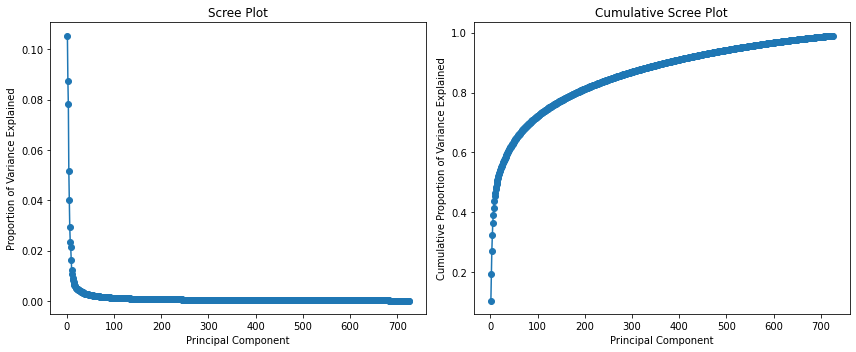

/N/u/javshah/Carbonate/.local/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


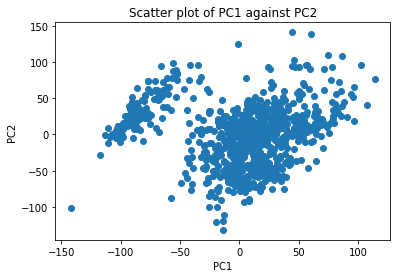

/N/u/javshah/Carbonate/.local/lib/python3.9/site-packages/pandas/core/internals/managers.py:1768: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = arr.astype(dtype, copy=False)


Correlation matrix:
              PC1           PC2
PC1  1.000000e+00 -1.923637e-15
PC2 -1.923637e-15  1.000000e+00
The total variance explained by first two PC's is (0.1929401381992425+0j)


In [58]:
variance_explained,loadings,principal_components,cumulative_variance_explained=principal_component_analysis(df_pancan)

# Applying Heirarchial Clustering after PCA

In [67]:

def heirarchial_code_run_after_PCA(linkage_type):
    import pandas as pd
    from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from scipy.cluster.hierarchy import fcluster
    scaler = StandardScaler()
    principal_components_real=principal_components.swifter.apply(np.real)
    principal_components_scaled =pd.DataFrame(scaler.fit_transform(principal_components_real))
    heirarchial_clustering=linkage(principal_components_scaled,method=linkage_type)
    distance_threshold = heirarchial_clustering[-5, 2] 
    labels = fcluster(heirarchial_clustering, distance_threshold, criterion='distance')
    error=heirarchial_wss(principal_components,labels,5)
    silhouette_avg=silheoutte_score(principal_components_real,labels)
    chs=Calinski_Harbaz_score(principal_components_real,labels)
    return error,linkage_type,silhouette_avg,chs
    
    

In [108]:
error_dict_PCA={}
silheoutte_dict_PCA={}
chs_dict_PCA={}
linkage_type=['complete','ward','single','average']
for i in linkage_type:
    error,linkage_type,silheotte_score,chs=heirarchial_code_run_after_PCA(str(i))
    error_dict_PCA[i]=error
    silheoutte_dict_PCA[i]=silheotte_score
    chs_dict_PCA[i]=chs
print(error_dict_PCA) 
print(silheoutte_dict_PCA)
print(chs_dict_PCA)

{'complete': 110896.371, 'ward': 110830.009, 'single': 110879.905, 'average': 110724.731}
{'complete': 0.0013807605354632319, 'ward': 0.10520709322122603, 'single': 0.019920887479859328, 'average': 0.17363508768956448}
{'complete': 2.2218494429595363, 'ward': 2.8546444112735303, 'single': 1.8877366385953933, 'average': 2.7109545362590444}


In [109]:
error_df_PCA=pd.DataFrame([error_dict_PCA])
error_df_PCA['Method']='After_PCA'
silheoutte_df_PCA=pd.DataFrame([silheoutte_dict_PCA])
silheoutte_df_PCA['Method']='After_PCA'
chs_df_PCA=pd.DataFrame([chs_dict_PCA])
chs_df_PCA['Method']='After_PCA'

In [115]:
error_final_df=pd.concat([error_df,error_df_PCA])
error_final_df

,complete,ward,single,average,Method
0,147834.523,118082.456,149993.538,149952.799,Before_PCA
0,110896.371,110830.009,110879.905,110724.731,After_PCA


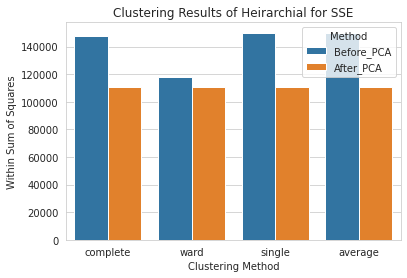

In [226]:
df_melt = pd.melt(error_final_df, id_vars=['Method'], var_name='Clustering Method', value_name='Within Sum of Squares')
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Clustering Method', y='Within Sum of Squares', hue='Method', data=df_melt)
ax.set_xlabel('Clustering Method')
ax.set_ylabel('Within Sum of Squares')
ax.set_title('Clustering Results of Heirarchial for SSE')
plt.show()

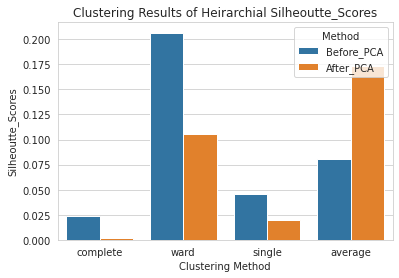

In [227]:
silheoutte_final_df=pd.concat([silheoutte_df,silheoutte_df_PCA])
df_melt = pd.melt(silheoutte_final_df, id_vars=['Method'], var_name='Clustering Method', value_name='Within Sum of Squares')
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Clustering Method', y='Within Sum of Squares', hue='Method', data=df_melt)
ax.set_xlabel('Clustering Method')
ax.set_ylabel('Silheoutte_Scores')
ax.set_title('Clustering Results of Heirarchial Silheoutte_Scores')
plt.show()

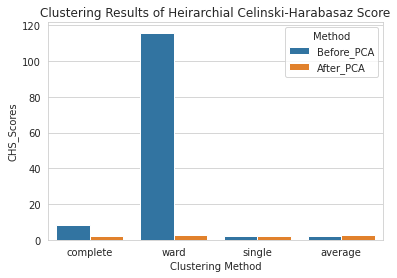

In [228]:
chs_final_df=pd.concat([chs_df,chs_df_PCA])
df_melt = pd.melt(chs_final_df, id_vars=['Method'], var_name='Clustering Method', value_name='Within Sum of Squares')
sns.set_style('whitegrid')
ax = sns.barplot(x='Clustering Method', y='Within Sum of Squares', hue='Method', data=df_melt)
ax.set_xlabel('Clustering Method')
ax.set_ylabel('CHS_Scores')
ax.set_title('Clustering Results of Heirarchial Celinski-Harabasaz Score')
plt.show()

# K means Clustering 

In [89]:
import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    list_of_centroids = []
    for cluster in range(no_of_clusters):
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    centroid_df.index.name='Cluster_Assigned'
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    df_original_label_join=input_dataframe.join(df_clustered_label)
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    return new_centroids.T


def kmeans_llyod(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    start_time=time.time()
    iteration=0
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        new_list_of_columns=df_new_centroids.columns.to_list()
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            df_cluster_label_copy=df_cluster_label.copy()
            df_cluster_label_copy.rename(columns={0:'Cluster_Assigned'},inplace=True)
            labels=df_cluster_label_copy['Cluster_Assigned'].to_list()
            silheoutte_score=silheoutte_score_Kmeans(input_dataframe,labels)
            chs_score=Calinski_Harbaz_score_Kmeans(input_dataframe,labels)
            end_time=time.time()
            return df_new_centroids,sum_of_square_error,silheoutte_score,chs_score,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    df_data_label=input_dataframe.join(df_cluster_label)
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)

def silheoutte_score_Kmeans(input_dataframe,labels):
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(input_dataframe, labels)
    return silhouette_avg

def Calinski_Harbaz_score_Kmeans(input_dataframe,labels):
    from sklearn.metrics import calinski_harabasz_score
    chs=calinski_harabasz_score(input_dataframe,labels)
    return chs


In [91]:
error_values=[]
for no_of_experiments in range(1,21):
    final_centroids,sum_of_squared_error,sil_score,chs_score,run_time=kmeans_llyod(df_pancan,5,10,100)
    error_values.append([5,no_of_experiments,sum_of_squared_error,sil_score,chs_score,run_time])
error_values_df= pd.DataFrame(error_values,columns=['No_of_Clusters', 'Iteration Number','Sum_of_squared_Errors','Silheoutte_Score','Chs_score','run_time'])  


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.584382634816141


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.9383712902699464


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.378549479468849


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.2644666883357254


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.487461849048759


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.859773990851405


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.5866285198623533


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.30702572481637


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.351850021406392


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.401460103124128


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.999602186517811


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.163757815379396


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.029309648470713


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.282378956999752


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.275473485314362


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.1567437623074737


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.423529445379621


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.801165440780057


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.7361972937340986


Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20531 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.476984552969634


In [93]:
error_values_df.to_csv('K_means_Question_03_before_PCA.csv')

In [134]:
error_values_df['Method']='Before_PCA'

# After Applying PCA

In [94]:
principal_components_real_part=principal_components.copy()
principal_components_real_part=principal_components_real_part.applymap(lambda x:x.real)
error_values=[]
for no_of_experiments in range(1,21):
    final_centroids,sum_of_squared_error,sil_score,chs_score,run_time=kmeans_llyod(principal_components_real_part,5,10,100)
    error_values.append([5,no_of_experiments,sum_of_squared_error,sil_score,chs_score,run_time])
error_values_df_PCA= pd.DataFrame(error_values,columns=['No_of_Clusters', 'Iteration Number','Sum_of_squared_Errors','Silheoutte_Score','Chs_score','run_time'])  


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.301589800892078


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.000729066223197


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.315694880460711


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.742643734986073


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.94329075464707


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.975058917605223


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.19865105755215


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.677518731020811


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.965295021214164


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.6159952925617582


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.844691040703678


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.8547700875842983


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.266783035144497


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.626257419976528


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.583806540128374


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.888196217258479


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.816856587468349


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.037502490526414


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.10788431332246


Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/725 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.968799713387099


In [95]:
error_values_df_PCA.to_csv('K_means_after_PCA_question_03.csv')

In [163]:
error_values_df_PCA=pd.read_csv('K_means_after_PCA_question_03.csv')
error_values_df_PCA.drop('Unnamed: 0',axis=1,inplace=True)

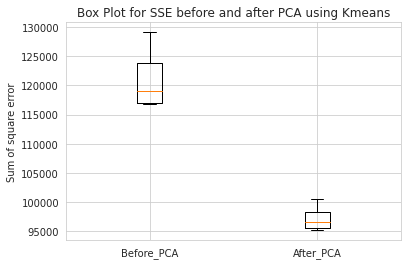

In [165]:
combined_df = pd.concat([error_values_df,error_values_df_PCA], keys=['Before_PCA','After_PCA'])
plt.boxplot([combined_df.loc['Before_PCA']['Sum_of_squared_Errors'], combined_df.loc['After_PCA']['Sum_of_squared_Errors']])
plt.xticks([1, 2], ['Before_PCA', 'After_PCA'])
plt.ylabel('Sum of square error')
plt.title('Box Plot for SSE before and after PCA using Kmeans')
plt.show()

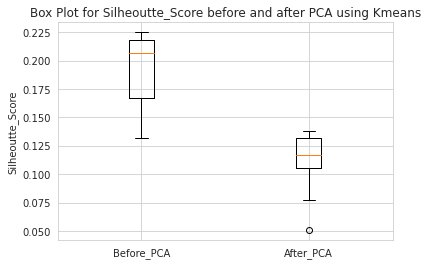

In [167]:
combined_df = pd.concat([error_values_df,error_values_df_PCA], keys=['Before_PCA','After_PCA'])
plt.boxplot([combined_df.loc['Before_PCA']['Silheoutte_Score'], combined_df.loc['After_PCA']['Silheoutte_Score']])
plt.xticks([1, 2], ['Before_PCA', 'After_PCA'])
plt.ylabel('Silheoutte_Score')
plt.title('Box Plot for Silheoutte_Score before and after PCA using Kmeans')
plt.show()

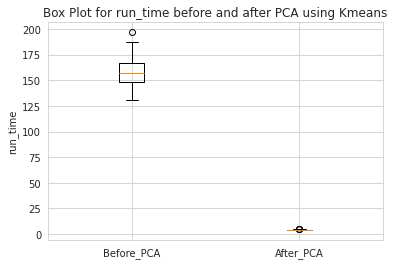

In [168]:
combined_df = pd.concat([error_values_df,error_values_df_PCA], keys=['Before_PCA','After_PCA'])
plt.boxplot([combined_df.loc['Before_PCA']['run_time'], combined_df.loc['After_PCA']['run_time']])
plt.xticks([1, 2], ['Before_PCA', 'After_PCA'])
plt.ylabel('run_time')
plt.title('Box Plot for run_time before and after PCA using Kmeans')
plt.show()

# Comparing Heirarchial Clustering and K means

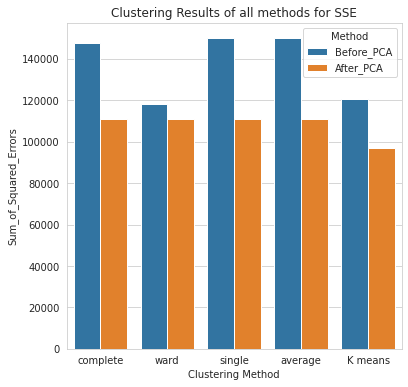

In [229]:
k_means_entire=pd.concat([error_values_df,error_values_df_PCA])
k_means_entire.fillna('After_PCA',inplace=True)
k_means_stats=k_means_entire.groupby('Method').mean().reset_index()
k_means_stats['Algorithm']='K means'
k_means_stats=k_means_stats[['Method','Sum_of_squared_Errors','Algorithm']]
df_melt_error = pd.melt(error_final_df, id_vars=['Method'], var_name='Algorithm', value_name='Sum_of_squared_Errors')
error_combined_cluster=pd.concat([df_melt_error,k_means_stats])
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(x='Algorithm', y='Sum_of_squared_Errors', hue='Method', data=error_combined_cluster)
ax.set_xlabel('Clustering Method')
ax.set_ylabel('Sum_of_Squared_Errors')
ax.set_title('Clustering Results of all methods for SSE')
plt.show()

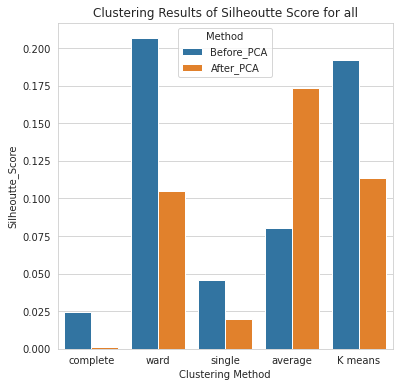

In [230]:
k_means_entire=pd.concat([error_values_df,error_values_df_PCA])
k_means_entire.fillna('After_PCA',inplace=True)
k_means_stats=k_means_entire.groupby('Method').mean().reset_index()
k_means_stats['Algorithm']='K means'
k_means_stats=k_means_stats[['Method','Silheoutte_Score','Algorithm']]
df_melt_error = pd.melt(silheoutte_final_df, id_vars=['Method'], var_name='Algorithm', value_name='Silheoutte_Score')
error_combined_cluster=pd.concat([df_melt_error,k_means_stats])
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(x='Algorithm', y='Silheoutte_Score', hue='Method', data=error_combined_cluster)
ax.set_xlabel('Clustering Method')
ax.set_ylabel('Silheoutte_Score')
ax.set_title('Clustering Results of Silheoutte Score for all')
plt.show()

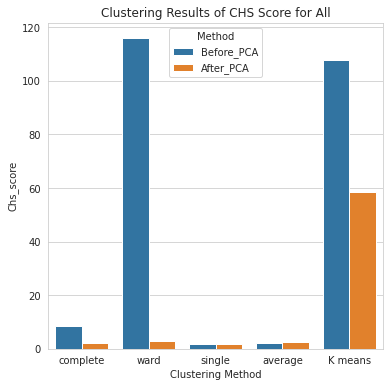

In [231]:
k_means_entire=pd.concat([error_values_df,error_values_df_PCA])
k_means_entire.fillna('After_PCA',inplace=True)
k_means_stats=k_means_entire.groupby('Method').mean().reset_index()
k_means_stats['Algorithm']='K means'
k_means_stats=k_means_stats[['Method','Chs_score','Algorithm']]
df_melt_error = pd.melt(chs_final_df, id_vars=['Method'], var_name='Algorithm', value_name='Chs_score')
error_combined_cluster=pd.concat([df_melt_error,k_means_stats])
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
ax = sns.barplot(x='Algorithm', y='Chs_score', hue='Method', data=error_combined_cluster)
ax.set_xlabel('Clustering Method')
ax.set_ylabel('Chs_score')
ax.set_title('Clustering Results of CHS Score for All')
plt.show()

# End of Document